# Portfolio with the Maximum Sharpe Ratio for the Media Sector

In [1]:
import random
random.seed(3)

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2021,1,1).date()

tickers= ['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
         'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ZEEL.NS   PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                 
2017-01-02      NaN      NaN       NaN          NaN            NaN   
2017-01-03  0.01484  0.01281   0.04376      0.03238        0.01085   
2017-01-04  0.00065  0.00329   0.00067      0.03603        0.00537   
2017-01-05  0.02638  0.01022   0.01594     -0.00279        0.01469   
2017-01-06 -0.01615 -0.00535  -0.00038     -0.01636        0.00000   
...             ...      ...       ...          ...            ...   
2020-12-24  0.00092 -0.02436  -0.00748      0.02172        0.00972   
2020-12-28  0.01312  0.02391   0.01280      0.08962        0.01124   
2020-12-29 -0.00908 -0.00946  -0.01019      0.00811       -0.01429   
2020-12-30  0.00458 -0.00616  -0.01060      0.00117        0.00000   
2020-12-31  0.01985  0.02341   0.00052      0.02534       -0.00483   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2017-01-02            NaN        NaN           NaN         NaN  
2017-01-03        0.01476    0.00708       0.01767     0.02235  
2017-01-04       -0.01583   -0.00703       0.01737     0.00683  
2017-01-05        0.00109    0.01769       0.01422    -0.00950  
2017-01-06       -0.00890   -0.00348      -0.01543    -0.03014  
...                   ...        ...           ...         ...  
2020-12-24       -0.00732   -0.05145       0.00411     0.02432  
2020-12-28        0.01708   -0.05763      -0.00136    -0.01187  
2020-12-29       -0.00636   -0.07554      -0.01229    -0.01502  
2020-12-30       -0.00089    0.03891       0.00000    -0.00305  
2020-12-31        0.00552    0.00375      -0.00692     0.01376  

[988 rows x 9 columns]

In [3]:
df.tail()

ZEEL.NS   PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                 
2020-12-24  0.00092 -0.02436  -0.00748      0.02172        0.00972   
2020-12-28  0.01312  0.02391   0.01280      0.08962        0.01124   
2020-12-29 -0.00908 -0.00946  -0.01019      0.00811       -0.01429   
2020-12-30  0.00458 -0.00616  -0.01060      0.00117        0.00000   
2020-12-31  0.01985  0.02341   0.00052      0.02534       -0.00483   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2020-12-24       -0.00732   -0.05145       0.00411     0.02432  
2020-12-28        0.01708   -0.05763      -0.00136    -0.01187  
2020-12-29       -0.00636   -0.07554      -0.01229    -0.01502  
2020-12-30       -0.00089    0.03891       0.00000    -0.00305  
2020-12-31        0.00552    0.00375      -0.00692     0.01376

In [4]:
mean_returns = df.mean() 
cov_matrix = df.cov()

print(mean_returns)
print(cov_matrix)

ZEEL.NS         -0.000148
PVR.NS           0.000464
SUNTV.NS         0.000397
SAREGAMA.NS      0.001934
TV18BRDCST.NS    0.000317
INOXLEISUR.NS    0.000573
DISHTV.NS       -0.001018
NETWORK18.NS     0.000509
HATHWAY.NS       0.000720
dtype: float64
                ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
ZEEL.NS        0.001075  0.000156  0.000219     0.000127       0.000246   
PVR.NS         0.000156  0.000643  0.000200     0.000162       0.000153   
SUNTV.NS       0.000219  0.000200  0.000662     0.000166       0.000296   
SAREGAMA.NS    0.000127  0.000162  0.000166     0.001131       0.000214   
TV18BRDCST.NS  0.000246  0.000153  0.000296     0.000214       0.001007   
INOXLEISUR.NS  0.000160  0.000327  0.000186     0.000174       0.000185   
DISHTV.NS      0.000556  0.000178  0.000330     0.000138       0.000295   
NETWORK18.NS   0.000227  0.000124  0.000225     0.000197       0.000640   
HATHWAY.NS     0.000163  0.000129  0.000191     0.000108       0.000476   



In [5]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
import random
random.seed(3)

In [7]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [8]:
result

array([[0.08732332, 0.32569479, 0.26811396, ..., 0.2504975 , 0.15636818,
        0.06908881],
       [0.1052083 , 0.29000842, 0.36277671, ..., 0.04705331, 0.19385578,
        0.12437046],
       [0.06376714, 0.2872335 , 0.22200454, ..., 0.16728672, 0.08378072,
        0.07001644],
       ...,
       [0.15038831, 0.31903234, 0.47138892, ..., 0.10833258, 0.17593971,
        0.16628928],
       [0.04258076, 0.30389177, 0.14011816, ..., 0.1723804 , 0.22655252,
        0.00553861],
       [0.14656171, 0.30990685, 0.47292182, ..., 0.10224068, 0.09461259,
        0.07472573]])

In [9]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean',
 'sd',
 'Sharpe',
 'ZEEL.NS',
 'PVR.NS',
 'SUNTV.NS',
 'SAREGAMA.NS',
 'TV18BRDCST.NS',
 'INOXLEISUR.NS',
 'DISHTV.NS',
 'NETWORK18.NS',
 'HATHWAY.NS']

In [10]:
result = pd.DataFrame(result,columns=columns)
result

mean        sd    Sharpe   ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  \
0     0.087323  0.325695  0.268114  0.145257  0.045286  0.000267     0.222968   
1     0.105208  0.290008  0.362777  0.217703  0.097008  0.098122     0.082661   
2     0.063767  0.287234  0.222005  0.152978  0.134966  0.128958     0.069796   
3     0.150590  0.292001  0.515719  0.068685  0.182802  0.059770     0.140800   
4     0.054591  0.287764  0.189708  0.191218  0.183075  0.223478     0.013792   
...        ...       ...       ...       ...       ...       ...          ...   
9995  0.093215  0.295625  0.315317  0.125344  0.123016  0.080512     0.111620   
9996  0.140796  0.292906  0.480688  0.020481  0.278911  0.049657     0.146409   
9997  0.150388  0.319032  0.471389  0.023721  0.010979  0.071977     0.193136   
9998  0.042581  0.303892  0.140118  0.167958  0.023505  0.140911     0.027679   
9999  0.146562  0.309907  0.472922  0.082061  0.038095  0.144880     0.230994   

      TV18BRDCST.NS  INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
0          0.085130       0.025138   0.250497      0.156368    0.069089  
1          0.055568       0.083658   0.047053      0.193856    0.124370  
2          0.023746       0.168473   0.167287      0.083781    0.070016  
3          0.135410       0.051603   0.032706      0.230487    0.097736  
4          0.078660       0.091976   0.098549      0.088365    0.030888  
...             ...            ...        ...           ...         ...  
9995       0.177084       0.046345   0.126327      0.102444    0.107307  
9996       0.273430       0.121208   0.055562      0.043922    0.010419  
9997       0.191216       0.058409   0.108333      0.175940    0.166289  
9998       0.020696       0.214779   0.172380      0.226553    0.005539  
9999       0.231287       0.001105   0.102241      0.094613    0.074726  

[10000 rows x 12 columns]

In [11]:
result.shape

(10000, 12)

In [12]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

mean             0.232729
sd               0.295825
Sharpe           0.786711
ZEEL.NS          0.047219
PVR.NS           0.068890
SUNTV.NS         0.142948
SAREGAMA.NS      0.348279
TV18BRDCST.NS    0.025889
INOXLEISUR.NS    0.145209
DISHTV.NS        0.036569
NETWORK18.NS     0.090510
HATHWAY.NS       0.094489
Name: 5596, dtype: float64


In [13]:
Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean             0.137185
sd               0.269565
Sharpe           0.508913
ZEEL.NS          0.118868
PVR.NS           0.151115
SUNTV.NS         0.162944
SAREGAMA.NS      0.124503
TV18BRDCST.NS    0.012347
INOXLEISUR.NS    0.170136
DISHTV.NS        0.040312
NETWORK18.NS     0.152767
HATHWAY.NS       0.067008
Name: 7581, dtype: float64


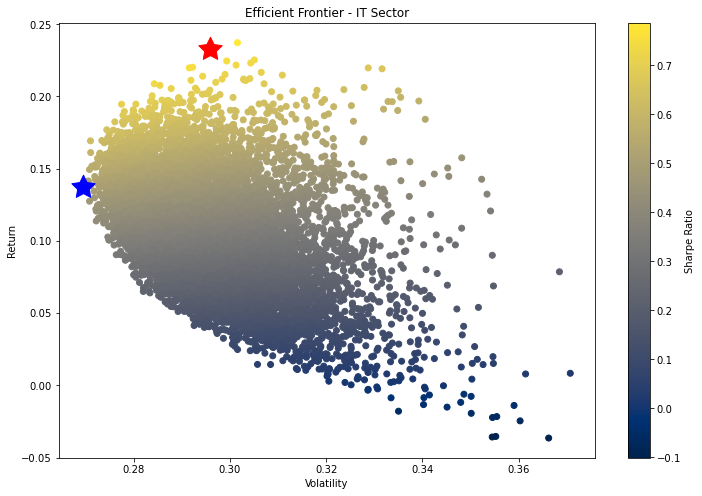

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Efficient Frontier - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()